## Concrete Analysis
Hope College<br>
Intro to Engineering<br>
2020-2023 Labs<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import re

In [2]:
data = pd.read_excel('Concrete Beam Testing Results_Anonymous.xlsx')
data.drop(labels=0, axis='index', inplace=True)
data.reset_index(inplace=True, drop=True)
data.head()

,Timestamp,Date and approximate time tests were performed,Water to Cement Ratio,Maximum Load for Unreinforced Beam (lbf),Maximum Load for Reinforced Beam (lbf)
0,2020-08-25 20:05:14.162,2020-08-25 08:30:00,0.55,620.1272 lbf,"2,059.9807 lbf"
1,2020-08-25 21:20:12.812,2020-08-25 16:30:00,Tuesdays lab (0.50 ratio),436.48571lbf,2184.34074lbf
2,2020-08-26 21:25:19.644,2020-08-25 15:14:00,0.5,458.85 lbf,610.12 lbf
3,2020-08-27 12:05:53.101,2020-08-25 12:00:00,0.5,443.82,1540.28
4,2020-08-27 13:02:48.533,2020-08-25 17:30:00,0.5,597.02,1680.72


#### Data Cleaning

In [3]:
## Rename cols
data.columns = ['timestamp', 'testtime', 'wc_ratio', 'unreinforced', 'reinforced']
data.head()

,timestamp,testtime,wc_ratio,unreinforced,reinforced
0,2020-08-25 20:05:14.162,2020-08-25 08:30:00,0.55,620.1272 lbf,"2,059.9807 lbf"
1,2020-08-25 21:20:12.812,2020-08-25 16:30:00,Tuesdays lab (0.50 ratio),436.48571lbf,2184.34074lbf
2,2020-08-26 21:25:19.644,2020-08-25 15:14:00,0.5,458.85 lbf,610.12 lbf
3,2020-08-27 12:05:53.101,2020-08-25 12:00:00,0.5,443.82,1540.28
4,2020-08-27 13:02:48.533,2020-08-25 17:30:00,0.5,597.02,1680.72


In [6]:
## Standardize wc_ratio column to only be 0.5 or 0.55
data['wc_ratio'] = [0.55 if "Thursday" in str(val) or "55" in str(val) else 0.50 for val in data['wc_ratio']]


## Delete any rows with negative values
data.reset_index(inplace=True, drop=True)
data['reinforced'] = data['reinforced'].astype(str)
data = data[data['reinforced'].str.contains('-')==False]

data.reset_index(inplace=True, drop=True)
data['unreinforced'] = data['unreinforced'].astype(str)
data = data[data['unreinforced'].str.contains('-')==False]


## Strip "lbf" and other non-numeric characters from cols
## /^-?[^\d,.]/g/
data.reset_index(inplace=True, drop=True)
non_decimal = re.compile(r'[^\d.]+')
data['reinforced'] = pd.Series([non_decimal.sub("", figure) for figure in data['reinforced'].astype(str)])
data['unreinforced'] = pd.Series([non_decimal.sub("", figure) for figure in data['unreinforced'].astype(str)])

## Convert empty cells to None and convert column type to float.
data['reinforced'] = np.array([None if val == '' else val for val in data['reinforced']]).astype(float)
data['unreinforced'] = np.array([None if val == '' else val for val in data['unreinforced']]).astype(float)


data

,timestamp,testtime,wc_ratio,unreinforced,reinforced
0,2020-08-25 20:05:14.162,2020-08-25 08:30:00,0.55,620.12720,2059.98070
1,2020-08-25 21:20:12.812,2020-08-25 16:30:00,0.50,436.48571,2184.34074
2,2020-08-26 21:25:19.644,2020-08-25 15:14:00,0.50,458.85000,610.12000
3,2020-08-27 12:05:53.101,2020-08-25 12:00:00,0.50,443.82000,1540.28000
4,2020-08-27 13:02:48.533,2020-08-25 17:30:00,0.50,597.02000,1680.72000
...,...,...,...,...,...
337,2023-10-05 13:08:38.428,2023-09-28 16:30:00,0.55,614.00000,1718.50000
338,2023-10-05 13:45:43.346,2023-09-28 16:30:00,0.55,452.82050,1910.07300
339,2023-10-05 14:05:48.096,2023-09-28 16:50:00,0.55,625.32570,2480.58600
340,2023-10-05 16:39:52.324,2023-09-28 12:45:00,0.55,471.49750,1694.77400


In [43]:
## Machine cannot apply more than 6,000lbf of pressure, so strip any data points that contain values that exceed that
## because they are due to human error.

data = data[data['unreinforced'] < 1000]
data = data[data['reinforced'] < 6000]
data.reset_index(inplace=True, drop=True)
data

,timestamp,testtime,wc_ratio,unreinforced,reinforced
0,2020-08-25 20:05:14.162,2020-08-25 08:30:00,0.55,620.12720,2059.98070
1,2020-08-25 21:20:12.812,2020-08-25 16:30:00,0.50,436.48571,2184.34074
2,2020-08-26 21:25:19.644,2020-08-25 15:14:00,0.50,458.85000,610.12000
3,2020-08-27 12:05:53.101,2020-08-25 12:00:00,0.50,443.82000,1540.28000
4,2020-08-27 13:02:48.533,2020-08-25 17:30:00,0.50,597.02000,1680.72000
...,...,...,...,...,...
320,2023-10-05 13:08:38.428,2023-09-28 16:30:00,0.55,614.00000,1718.50000
321,2023-10-05 13:45:43.346,2023-09-28 16:30:00,0.55,452.82050,1910.07300
322,2023-10-05 14:05:48.096,2023-09-28 16:50:00,0.55,625.32570,2480.58600
323,2023-10-05 16:39:52.324,2023-09-28 12:45:00,0.55,471.49750,1694.77400


In [44]:
## TO DO: Convert testtime column to datetime.
data.dtypes

timestamp       datetime64[ns]
testtime                object
wc_ratio               float64
unreinforced           float64
reinforced             float64
dtype: object

In [45]:
data50 = data[data['wc_ratio']==0.50]
data55 = data[data['wc_ratio']==0.55]

In [46]:
data50.describe()

,wc_ratio,unreinforced,reinforced
count,156.0,156.000000,156.000000
mean,0.5,540.614650,2102.137731
std,0.0,167.073453,604.373879
min,0.5,0.111710,339.019450
25%,0.5,460.089600,1724.963638
50%,0.5,565.545615,2084.486600
75%,0.5,649.439575,2421.421467
max,0.5,952.140030,4149.528000


In [47]:
data55.describe()

,wc_ratio,unreinforced,reinforced
count,1.690000e+02,169.000000,169.000000
mean,5.500000e-01,503.784213,1909.857108
std,1.113522e-16,159.219079,564.875316
min,5.500000e-01,1.000000,128.440920
25%,5.500000e-01,422.475830,1655.000000
50%,5.500000e-01,488.950000,1896.108000
75%,5.500000e-01,597.065220,2229.990580
max,5.500000e-01,880.000000,3179.486880


Text(0.5, 0, 'Type')

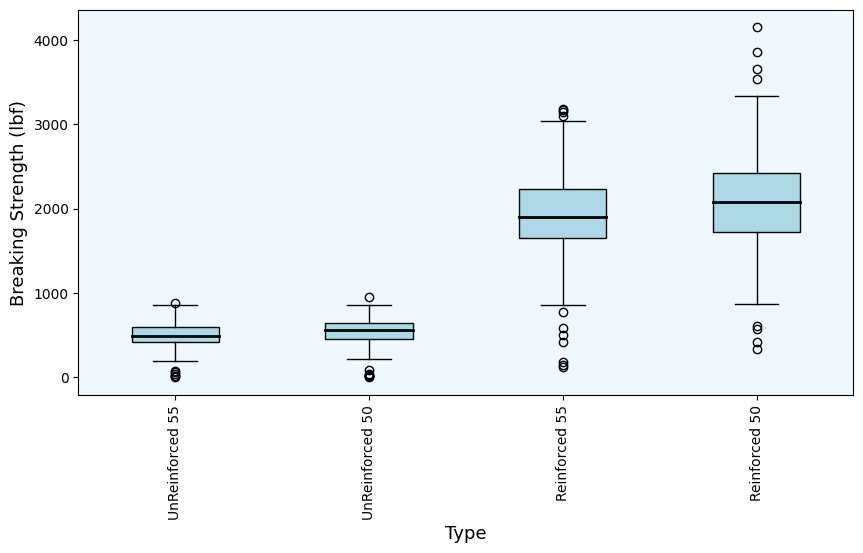

In [48]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)

vals = {'UnReinforced 55': data55['unreinforced'], 'UnReinforced 50': data50['unreinforced'], 'Reinforced 55': data55['reinforced'], 'Reinforced 50': data50['reinforced']}
ax.boxplot(vals.values(),patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=2),)
ax.set_facecolor('aliceblue')
ax.set_xticklabels(vals.keys(), rotation = 90)
ax.set_ylabel('Breaking Strength (lbf)', size = 13)
ax.set_xlabel('Type', size = 13)

In [49]:
## Is the difference in mean statistically significant?
stats.ttest_ind(data50['unreinforced'], data55['unreinforced'], axis=0)

Ttest_indResult(statistic=2.034645895460831, pvalue=0.042702936594808526)

In [50]:
stats.ttest_ind(data50['reinforced'], data55['reinforced'], axis=0)

Ttest_indResult(statistic=2.9645948555978228, pvalue=0.00325629620510519)

### Comparing Data Between Years

In [51]:
data2020 = data[data['timestamp'].dt.year == 2020]
data2021 = data[data['timestamp'].dt.year == 2021]
data2022 = data[data['timestamp'].dt.year == 2022]
data2023 = data[data['timestamp'].dt.year == 2023]

In [52]:
data2020_50 = data2020[data2020['wc_ratio']==0.50]
data2020_55 = data2020[data2020['wc_ratio']==0.55]

data2021_50 = data2021[data2021['wc_ratio']==0.50]
data2021_55 = data2021[data2021['wc_ratio']==0.55]

data2022_50 = data2022[data2022['wc_ratio']==0.50]
data2022_55 = data2022[data2022['wc_ratio']==0.55]

data2023_50 = data2023[data2023['wc_ratio']==0.50]
data2023_55 = data2023[data2023['wc_ratio']==0.55]

In [53]:
## Summarize all 50
data2020_50.describe()

,wc_ratio,unreinforced,reinforced
count,35.0,35.000000,35.000000
mean,0.5,426.382193,1673.908211
std,0.0,154.823768,510.004385
min,0.5,0.111710,339.019450
25%,0.5,384.822000,1534.468500
50%,0.5,443.328120,1728.398850
75%,0.5,485.319250,2010.590470
max,0.5,711.399200,2399.889450


In [54]:
data2021_50.describe()

,wc_ratio,unreinforced,reinforced
count,46.0,46.000000,46.000000
mean,0.5,605.112135,2280.418423
std,0.0,134.553585,466.753871
min,0.5,91.917280,869.089210
25%,0.5,525.604687,1988.232500
50%,0.5,603.039350,2253.825500
75%,0.5,681.312648,2606.223635
max,0.5,952.140030,3075.991000


In [55]:
data2022_50.describe()

,wc_ratio,unreinforced,reinforced
count,27.0,27.000000,27.000000
mean,0.5,588.767285,2181.182737
std,0.0,178.488465,548.915382
min,0.5,12.000000,865.961720
25%,0.5,559.890000,1851.530000
50%,0.5,604.247600,2286.000000
75%,0.5,655.495375,2475.000000
max,0.5,860.489310,3539.230000


In [56]:
data2023_50.describe()

,wc_ratio,unreinforced,reinforced
count,48.0,48.000000,48.000000
mean,0.5,535.013203,2199.073277
std,0.0,156.857413,678.470867
min,0.5,28.550000,1145.625290
25%,0.5,460.965250,1686.404880
50%,0.5,558.341950,2132.264055
75%,0.5,657.790900,2440.487480
max,0.5,778.145900,4149.528000


Text(0.5, 1.0, 'Unreinforced Concrete with a Water Ratio of .50')

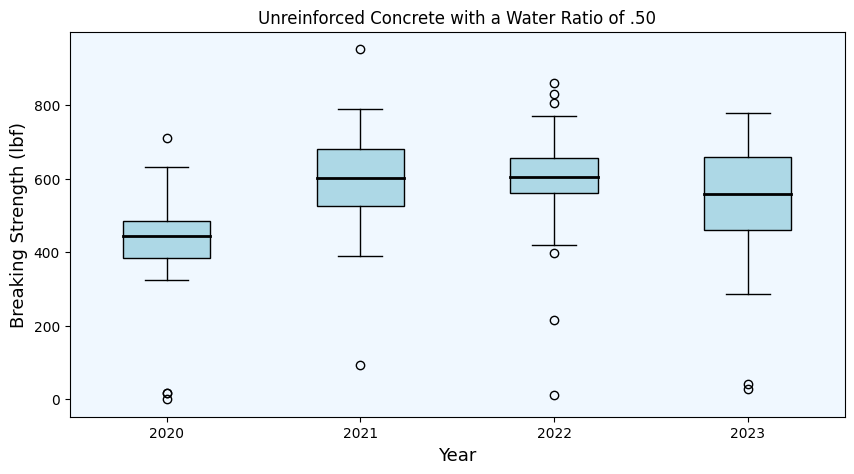

In [58]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)

vals = {'2020': data2020_50['unreinforced'], '2021': data2021_50['unreinforced'], '2022': data2022_50['unreinforced'], '2023': data2023_50['unreinforced']}
ax.boxplot(vals.values(),patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=2),)
ax.set_facecolor('aliceblue')
ax.set_xticklabels(vals.keys())
ax.set_ylabel('Breaking Strength (lbf)', size = 13)
ax.set_xlabel('Year', size = 13)
ax.set_title('Unreinforced Concrete with a Water Ratio of .50')

Text(0.5, 1.0, 'Unreinforced Concrete with a Water Ratio of .55')

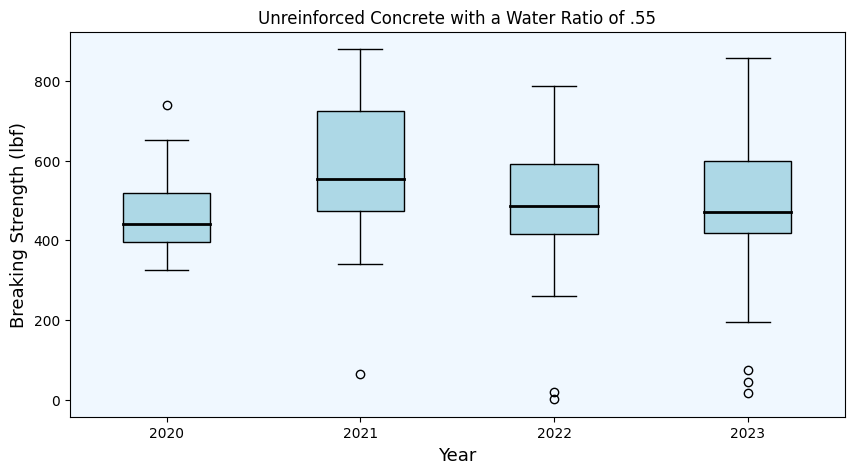

In [60]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)

vals = {'2020': data2020_55['unreinforced'], '2021': data2021_55['unreinforced'], '2022': data2022_55['unreinforced'], '2023': data2023_55['unreinforced']}
ax.boxplot(vals.values(),patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=2),)
ax.set_facecolor('aliceblue')
ax.set_xticklabels(vals.keys())
ax.set_ylabel('Breaking Strength (lbf)', size = 13)
ax.set_xlabel('Year', size = 13)
ax.set_title('Unreinforced Concrete with a Water Ratio of .55')

### Compare P-Values of Different Years


Water Ratio: 0.55

Is the difference in the mean between 2021 and 2023 for unreinforced concrete at a water ratio of 0.55 statistically significant?

In [65]:
stats.ttest_ind(data2021_55['unreinforced'], data2023_55['unreinforced'], axis=0)

Ttest_indResult(statistic=2.6355650880959276, pvalue=0.009982306651204021)

Is the difference in the mean between 2020 and 2022 for unreinforced concrete at a water ratio of 0.55 statistically significant?

In [66]:
stats.ttest_ind(data2020_55['unreinforced'], data2022_55['unreinforced'], axis=0)

Ttest_indResult(statistic=-1.1827757557655552, pvalue=0.24040128359715768)

Is the difference in the mean between 2020 and 2023 for unreinforced concrete at a water ratio of 0.55 statistically significant?

In [67]:
stats.ttest_ind(data2020_55['unreinforced'], data2023_55['unreinforced'], axis=0)

Ttest_indResult(statistic=-0.5578931435702279, pvalue=0.5783838024735231)

Water Ratio: 0.50

Is the difference in the mean between 2020 and 2021 for unreinforced concrete at a water ratio of 0.55 statistically significant?

In [68]:
stats.ttest_ind(data2020_50['unreinforced'], data2021_50['unreinforced'], axis=0)

Ttest_indResult(statistic=-5.5478789652828135, pvalue=3.7223406867572385e-07)

### Compare means within the same year.

Is the difference in mean between unreinforced concrete with a water ratio of 0.5 significantly different from the mean with a water ratio of 0.55 in the same year?

In [69]:
## 2023
stats.ttest_ind(data2023_50['unreinforced'], data2023_55['unreinforced'], axis=0)

Ttest_indResult(statistic=1.584789717442967, pvalue=0.1164832948672539)

In [70]:
## 2022
stats.ttest_ind(data2022_50['unreinforced'], data2022_55['unreinforced'], axis=0)

Ttest_indResult(statistic=2.1039928839602364, pvalue=0.039252120157151654)

In [71]:
## 2021
stats.ttest_ind(data2021_50['unreinforced'], data2021_55['unreinforced'], axis=0)

Ttest_indResult(statistic=0.9214797611889503, pvalue=0.35937783030632064)

In [72]:
## 2020
stats.ttest_ind(data2020_50['unreinforced'], data2020_55['unreinforced'], axis=0)

Ttest_indResult(statistic=-1.2641184378582377, pvalue=0.2101021923744449)